In [1]:
from pathlib import Path
import cantera as ct
import matplotlib.pyplot as plt
%matplotlib inline
import math as math
import numpy as np

In [2]:
Air_flow_rate = 5130 # Kg/h
hydraulic_dia = 1.54 # m
Area_air_inlet = (np.pi/4)*hydraulic_dia*hydraulic_dia

fuel_flow_rate = 325 # Kg/h
dia_nozzle = 0.044  # m
Area_fuel_inlet = (np.pi/4)*dia_nozzle*dia_nozzle

air_temp = 1392 # K

fuel_mass_flow = fuel_flow_rate/(3600*Area_fuel_inlet)
air_mass_flow = Air_flow_rate/(3600*Area_air_inlet)

print(fuel_mass_flow)
print(air_mass_flow)

59.372539606136364
0.7650389404822089


In [3]:
H2_fraction = [0, 0.2, 0.4, 0.6] # *100 percentage of hydrogen in Natural-gas 
fuel_ratio = [2, 2.1, 2.3, 2.4]  # with increase in percentage of H2, flame-blow out happens, because of the 
# increased fuel speed, hence the fuel is reduced by a small amount such that combustion takes place

Z_points = []
YH2O_values = []
YCO2_values = []
YNO_values = []
YCO_values = []
species_of_interest = ['C2H6', 'CH3', 'CO', 'NO', 'CO2', 'H2O', 'H','CH2','O2']  # Replace with your desired species
flame_temp = []
flame_heat_release = []
flame_grid = []

for i in range(len(H2_fraction)):
    P = 101375  # initial pressure in the combustion chamber - 50 Pa above atmospheric pressure
    CH4 = 0.88*(1-H2_fraction[i])
    C2H6 = 0.05*(1-H2_fraction[i])
    N2 = 0.07*(1-H2_fraction[i])
    H2 = H2_fraction[i]
    comp_o = 'O2:0.21, N2:0.79'  # air composition
    comp_f = {'CH4':CH4, 'C2H6':C2H6, 'N2':N2, 'H2':H2}  # fuel composition
    width = 0.2  # Distance between fuel and air inlets is 20 cm

    loglevel = 1  # amount of diagnostic output (0 to 5)

    # Creating the gas object used to evaluate all thermodynamic, kinetic, and transport properties.
    gas = ct.Solution('gri30.yaml')
    gas.TP = gas.T, P

    # Creating an object representing the counterflow flame configuration,
    # which consists of a fuel inlet on the left, the flow in the middle,
    # and the oxidizer inlet on the right.
    f = ct.CounterflowDiffusionFlame(gas, width=width)

    # Setting the state of the two inlets
    f.fuel_inlet.mdot = fuel_mass_flow/fuel_ratio[i]   # assuming radial flow rate to be half of the axial flow rate
    f.fuel_inlet.X = comp_f
    f.fuel_inlet.T = 303

    f.oxidizer_inlet.mdot = air_mass_flow/2   # assuming radial flow rate to be half of the axial flow rate
    f.oxidizer_inlet.X = comp_o
    f.oxidizer_inlet.T = air_temp

    # Keeping the boundary emissivities as zero 
    # can be tailored depending on the boundary emissivity
    f.boundary_emissivities = 0.0, 0.0
    # Turning radiation off
    f.radiation_enabled = False

    f.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

    # Solving the problem
    f.solve(loglevel, auto=True)
    f.show()

    # to store the data from the flame
    Z_points_val = f.mixture_fraction('Bilger')
    YH2O_values_val = f.Y[gas.species_index('H2O')]
    YCO2_values_val = f.Y[gas.species_index('CO2')]
    YNO_values_val = f.Y[gas.species_index('NO')]
    YCO_values_val = f.Y[gas.species_index('CO')]
    flame_temp_val = f.T
    flame_grid_val = f.flame.grid
    flame_heat_release_val = f.heat_release_rate / 1000000

    # Append values to the lists
    Z_points.append(Z_points_val)
    YH2O_values.append(YH2O_values_val)
    YCO2_values.append(YCO2_values_val)
    YNO_values.append(YNO_values_val)
    YCO_values.append(YCO_values_val)
    flame_temp.append(flame_temp_val)
    flame_heat_release.append(flame_heat_release_val)
    flame_grid.append(flame_grid_val)
    '''
    # to store the data from the flame
    Z_points_val = []
    YH2O_values_val = []
    YCO2_values_val = []
    YNO_values_val = []
    YCO_values_val = []
    production_rates_val = []
    flame_temp_val = []
    flame_heat_release_val = []
    flame_grid_val = []

    Z_points_val.append(f.mixture_fraction('Bilger'))
    YH2O_values_val.append(f.Y[gas.species_index('H2O')])
    YCO2_values_val.append(f.Y[gas.species_index('CO2')])
    YNO_values_val.append(f.Y[gas.species_index('NO')])
    YCO_values_val.append(f.Y[gas.species_index('CO')])
    flame_temp_val = f.T
    flame_grid_val = f.flame.grid
    flame_heat_release_val = f.heat_release_rate/1000000
    
    #Z_points = Z_points.append(Z_points_val[0])
    YH2O_values =  YH2O_values.append(YH2O_values_val)
    YCO2_values = YCO2_values.append(YCO2_values_val)
    YNO_values = YNO_values.append(YNO_values_val)
    YCO_values = YCO_values.append(YCO_values_val)
    flame_temp = flame_temp.append(flame_temp_val)
    flame_heat_release = flame_heat_release.append(flame_heat_release_val)
    flame_grid = flame_grid.append(flame_grid_val)
    '''


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

******** Initial solve failed; Retrying with energy equation disabled ********

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

********** Solving on 6 point grid with energy equation re-enabled ***********

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

....

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.543e-05       5.01
Attempt Newton solution of steady-state problem...    success.

Problem solved on [75] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 
    to resolve C C2H C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CN CO CO2 H H2 H2CN H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HNO HO2 HOCN N N2 N2O NCO NH NH2 NH3 NO NO2 O O2 OH T velocity 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001709      4.774
Attemp


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      3.933
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

******** Initial solve failed; Retrying with energy equation disabled ********

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      3.933
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

********** Solving on 6 point grid with energy equa

Take 10 timesteps     1.068e-05      5.952
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002737      5.152
Attempt Newton solution of steady-state problem...    success.

Problem solved on [65] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 51 52 53 54 55 56 57 58 59 60 61 62 
    to resolve C C2H C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CN CO CO2 H H2 H2CN H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HNO HO2 HOCN N N2 N2O NCO NH NH2 NH3 NNH NO NO2 O O2 OH T spread_rate velocity 
##############################################################################
refine: discarding point at 0.1920212765957447

..............................................................................
Attempt Newton solutio


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      4.016
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

******** Initial solve failed; Retrying with energy equation disabled ********

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      4.015
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

********** Solving on 6 point grid with energy equa

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.068e-05      6.099
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002737      5.191
Attempt Newton solution of steady-state problem...    success.

Problem solved on [65] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 51 52 53 54 55 56 57 58 59 60 61 62 
    to resolve C C2H C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CN CO CO2 H H2 H2CN H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HNO HO2 HOCN N N2 N2O NCO NH NH2 NH3 NNH NO NO2 O O2 OH T spread_rate velocity 
##############################################################################
refine: discarding point at 0.1920212765957447

.....................................


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      4.138
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

******** Initial solve failed; Retrying with energy equation disabled ********

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      4.137
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

********** Solving on 6 point grid with energy equa

Take 10 timesteps     0.0001709      5.299
Attempt Newton solution of steady-state problem...    success.

Problem solved on [65] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 52 53 54 55 56 57 58 59 60 61 62 63 
    to resolve C C2H C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CN CO CO2 H H2 H2CN H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HNO HO2 HOCN N N2 N2O NCO NH NH2 NH3 NNH NO NO2 O O2 OH T spread_rate velocity 
##############################################################################
refine: discarding point at 0.1920212765957447

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002563      5.078
Attempt Newton solutio

(0.192, 0.2)

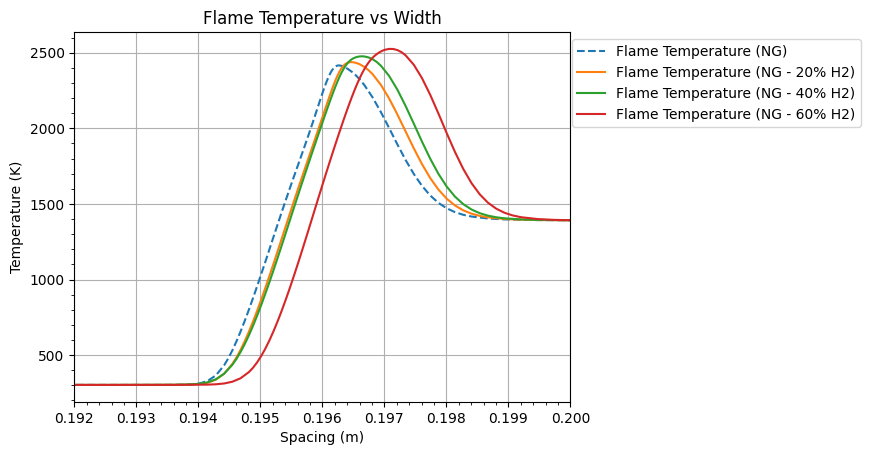

In [4]:
plt.plot(flame_grid[0], flame_temp[0], label='Flame Temperature (NG)', linestyle = '--' )
plt.plot(flame_grid[1], flame_temp[1], label='Flame Temperature (NG - 20% H2)')
plt.plot(flame_grid[2], flame_temp[2], label='Flame Temperature (NG - 40% H2)')
plt.plot(flame_grid[3], flame_temp[3], label='Flame Temperature (NG - 60% H2)')
plt.minorticks_on()
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.grid(True)
plt.grid(True)
plt.xlabel('Spacing (m)')
plt.ylabel('Temperature (K)')
plt.title('Flame Temperature vs Width')

plt.xlim([0.192, 0.2])

(0.195, 0.2)

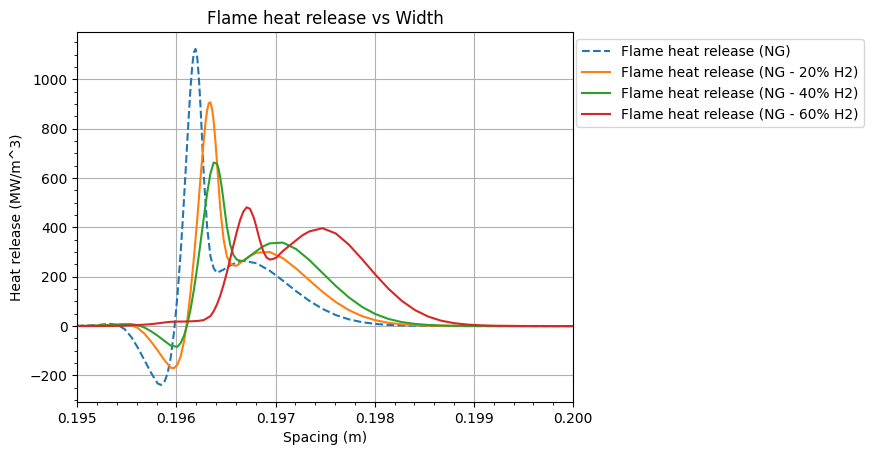

In [5]:
plt.plot(flame_grid[0], flame_heat_release[0], label='Flame heat release (NG)', linestyle = '--')
plt.plot(flame_grid[1], flame_heat_release[1], label='Flame heat release (NG - 20% H2)')
plt.plot(flame_grid[2], flame_heat_release[2], label='Flame heat release (NG - 40% H2)')
plt.plot(flame_grid[3], flame_heat_release[3], label='Flame heat release (NG - 60% H2)')
plt.minorticks_on()
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.grid(True)
plt.grid(True)
plt.xlabel('Spacing (m)')
plt.ylabel('Heat release (MW/m^3)')
plt.title('Flame heat release vs Width')
plt.xlim([0.195, 0.2])

(0.192, 0.2)

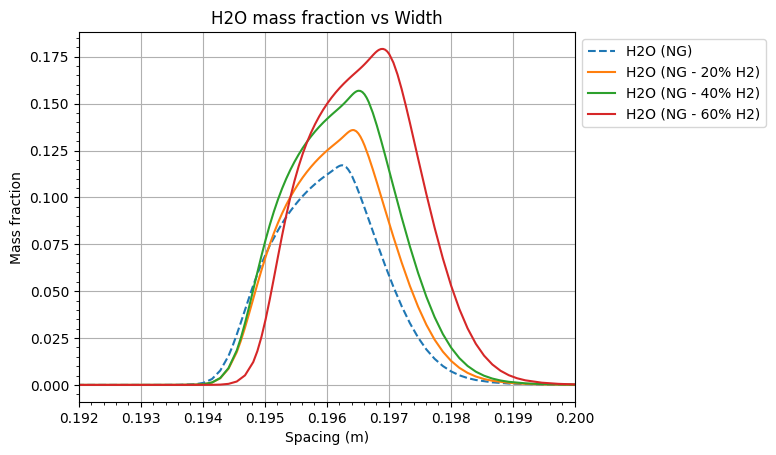

In [6]:
plt.plot(flame_grid[0], YH2O_values[0], label='H2O (NG)', linestyle = '--')
plt.plot(flame_grid[1], YH2O_values[1], label='H2O (NG - 20% H2)')
plt.plot(flame_grid[2], YH2O_values[2], label='H2O (NG - 40% H2)')
plt.plot(flame_grid[3], YH2O_values[3], label='H2O (NG - 60% H2)')
plt.minorticks_on()
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.grid(True)
plt.grid(True)
plt.xlabel('Spacing (m)')
plt.ylabel('Mass fraction')
plt.title('H2O mass fraction vs Width')
plt.xlim([0.192, 0.2])

(0.192, 0.2)

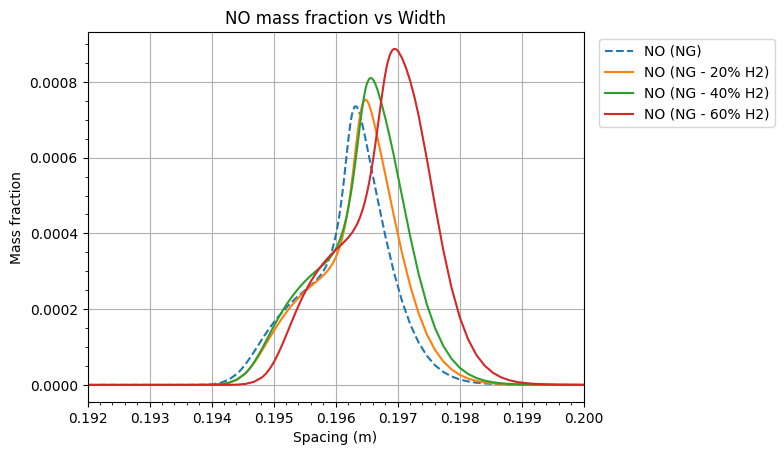

In [7]:
plt.plot(flame_grid[0], YNO_values[0], label='NO (NG)', linestyle = '--')
plt.plot(flame_grid[1], YNO_values[1], label='NO (NG - 20% H2)')
plt.plot(flame_grid[2], YNO_values[2], label='NO (NG - 40% H2)')
plt.plot(flame_grid[3], YNO_values[3], label='NO (NG - 60% H2)')
plt.minorticks_on()
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.grid(True)
plt.grid(True)
plt.xlabel('Spacing (m)')
plt.ylabel('Mass fraction')
plt.title('NO mass fraction vs Width')
plt.xlim([0.192, 0.2])

(0.192, 0.2)

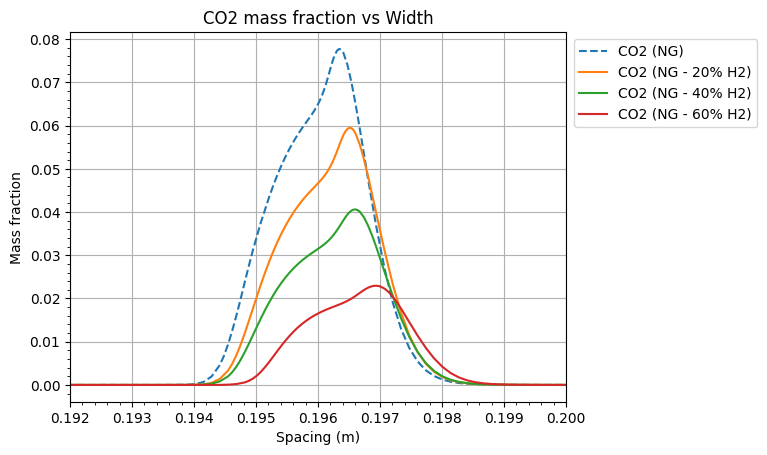

In [8]:
plt.plot(flame_grid[0], YCO2_values[0], label='CO2 (NG)', linestyle = '--')
plt.plot(flame_grid[1], YCO2_values[1], label='CO2 (NG - 20% H2)')
plt.plot(flame_grid[2], YCO2_values[2], label='CO2 (NG - 40% H2)')
plt.plot(flame_grid[3], YCO2_values[3], label='CO2 (NG - 60% H2)')
plt.minorticks_on()
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.grid(True)
plt.grid(True)
plt.xlabel('Spacing (m)')
plt.ylabel('Mass fraction')
plt.title('CO2 mass fraction vs Width')
plt.xlim([0.192, 0.2])

(0.192, 0.2)

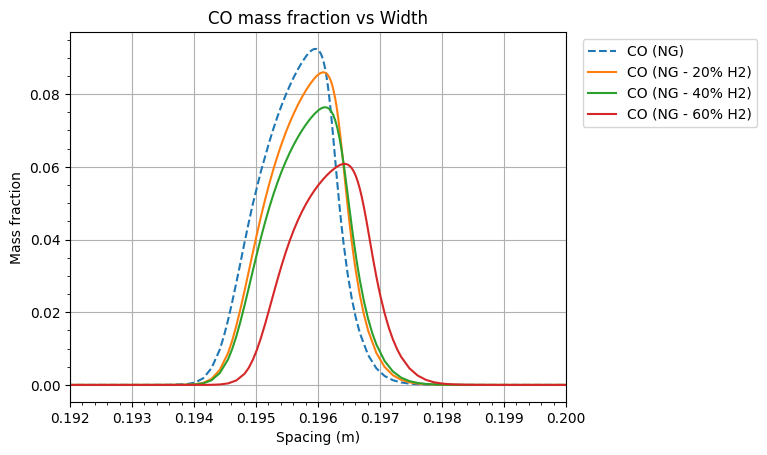

In [9]:
plt.plot(flame_grid[0], YCO_values[0], label='CO (NG)', linestyle = '--')
plt.plot(flame_grid[1], YCO_values[1], label='CO (NG - 20% H2)')
plt.plot(flame_grid[2], YCO_values[2], label='CO (NG - 40% H2)')
plt.plot(flame_grid[3], YCO_values[3], label='CO (NG - 60% H2)')
plt.minorticks_on()
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.grid(True)
plt.grid(True)
plt.xlabel('Spacing (m)')
plt.ylabel('Mass fraction')
plt.title('CO mass fraction vs Width')
plt.xlim([0.192, 0.2])

In [13]:
print(max(YCO2_values[0]))
print(max(YCO2_values[1]))
print(max(YCO2_values[2]))
print(max(YCO2_values[3]))

0.07774599517785545
0.05950469642464999
0.04059856397465233
0.022944180944610766
